# AB TESTİ

In [334]:
import pandas as pd

df = pd.read_excel("Data_Science_Case_Study.xlsx",  sheet_name = "Control Group")
df1 = pd.read_excel("Data_Science_Case_Study.xlsx",  sheet_name = "Test Group")

In [335]:
df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [336]:
df1.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492


In [337]:
print(df.shape, df1.shape)

(32, 10) (30, 10)


In [338]:
df = df[["# of Purchase"]]
df = df.rename(columns = {'# of Purchase':'Control_Group'})
df.head()

,Control_Group
0,383.0
1,644.0
2,639.0
3,649.0
4,455.0


In [339]:
df.isnull().sum()

Control_Group    3
dtype: int64

In [340]:
df = df.iloc[0:30]
df.head()

,Control_Group
0,383.0
1,644.0
2,639.0
3,649.0
4,455.0


In [341]:
df.isnull().sum()

Control_Group    1
dtype: int64

In [342]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

Control_Group    0
dtype: int64

In [343]:
df.shape

(30, 1)

In [344]:
df1 = df1[["# of Purchase"]]
df1 = df1.rename(columns={ '# of Purchase' : 'Test_Group'})
df1.head()

,Test_Group
0,913
1,510
2,391
3,434
4,492


In [345]:
df1.shape

(30, 1)

In [346]:
df1.isnull().sum()

Test_Group    0
dtype: int64

In [347]:
df = pd.concat([df, df1], axis = 1)
df.head()

,Control_Group,Test_Group
0,383.0,913
1,644.0,510
2,639.0,391
3,649.0,434
4,455.0,492


In [348]:
df.shape

(30, 2)

# Bağımsız İki Örneklem T Testi

## 1) Varsayım Kontrolü

1. Normallik Varsayımı
2. Varyans Homojenliği

## 1.1) Normallik Varsayımı

H0: Normal dağılım varsayımı sağlanmaktadır.

H1: .. sağlanmamaktadır.

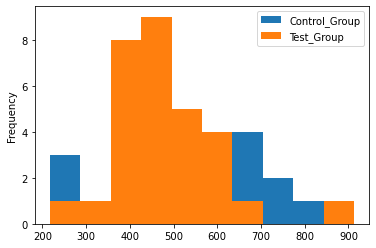

In [349]:
#histogram
pd.DataFrame(df).plot.hist();

In [350]:
#qqplot
import scipy.stats as stats
import pylab
stats.probplot(df, dist="norm", plot=pylab)
pylab.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 30 and the array at index 1 has size 2

In [351]:
from scipy.stats import shapiro

In [352]:
df.columns

Index(['Control_Group', 'Test_Group'], dtype='object')

In [353]:
shapiro(df.Control_Group)

(0.9882174134254456, 0.9788618683815002)

In [355]:
0.978861 < 0.05 # p_value değeri 0.05'den küçük olmadığı için H0 hipotezi reddedilmez. Normallik varsayımı sağlanmamaktadır. 

False

In [354]:
shapiro(df.Test_Group)

(0.9188652038574219, 0.02506561577320099)

In [332]:
# p_value değeri 0.05'den küçük olduğu için H0 hipotezi reddedilir. Normallik varsayımı sağlanmaktadır. 
# Ancak her iki gruptan birinde normallik varsayımı sağlanmaz ise nonparametric Bağımsız İki Örneklem Testi uygulanmaktadır. 
0.025065 < 0.05 

True

## 2) Varsayım Homojenliği Varsayımı


H0: Varyanslar Homojendir

H1: Varyanslar Homojen Değildir

p-value < ise 0.05'ten HO RED.

p-value < değilse 0.05 H0 REDDEDILEMEZ.

In [356]:
stats.levene(df.Control_Group, df.Test_Group)

LeveneResult(statistic=1.4573242947259228, pvalue=0.23225655710383264)

In [357]:
0.23225 < 0.05 # p_value değeri 0.05'den küçük olmadığı için H0 Hipotezi reddedilemez. Varyanslar homojendir.

False

## 3) Nonparametrik Bağımsız İki Örneklem Testi

In [358]:
stats.mannwhitneyu(df.Control_Group, df.Test_Group)

MannwhitneyuResult(statistic=391.0, pvalue=0.19352350307853528)

In [359]:
0.19352 < 0.05

False